In [133]:
import pickle
import sys
sys.path.append("../tools/")
import pandas as pd
import pickle
from pandas import DataFrame, np
import matplotlib.pyplot as plt
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

In [3]:
df = DataFrame(data_dict)

In [4]:
df.head()

,ALLEN PHILLIP K,BADUM JAMES P,BANNANTINE JAMES M,BAXTER JOHN C,BAY FRANKLIN R,BAZELIDES PHILIP J,BECK SALLY W,BELDEN TIMOTHY N,BELFER ROBERT,BERBERIAN DAVID,...,WASAFF GEORGE,WESTFAHL RICHARD K,WHALEY DAVID A,WHALLEY LAWRENCE G,WHITE JR THOMAS E,WINOKUR JR. HERBERT S,WODRASKA JOHN,WROBEL BRUCE,YEAGER F SCOTT,YEAP SOON
bonus,4175000,NaN,NaN,1200000,400000,NaN,700000,5249999,NaN,NaN,...,325000,NaN,NaN,3000000,450000,NaN,NaN,NaN,NaN,NaN
deferral_payments,2869717,178980,NaN,1295738,260455,684694,NaN,2144013,-102500,NaN,...,831299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deferred_income,-3081055,NaN,-5104,-1386055,-201641,NaN,NaN,-2334434,NaN,NaN,...,-583325,-10800,NaN,NaN,NaN,-25000,NaN,NaN,NaN,NaN
director_fees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3285,NaN,...,NaN,NaN,NaN,NaN,NaN,108579,NaN,NaN,NaN,NaN
email_address,phillip.allen@enron.com,NaN,james.bannantine@enron.com,NaN,frank.bay@enron.com,NaN,sally.beck@enron.com,tim.belden@enron.com,NaN,david.berberian@enron.com,...,george.wasaff@enron.com,dick.westfahl@enron.com,NaN,greg.whalley@enron.com,thomas.white@enron.com,NaN,john.wodraska@enron.com,NaN,scott.yeager@enron.com,NaN


In [5]:
df.transpose().head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, bonus to total_stock_value
Columns: 146 entries, ALLEN PHILLIP K to YEAP SOON
dtypes: object(146)
memory usage: 24.7+ KB


In [7]:
df.transpose().info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        146 non-null object
deferral_payments            146 non-null object
deferred_income              146 non-null object
director_fees                146 non-null object
email_address                146 non-null object
exercised_stock_options      146 non-null object
expenses                     146 non-null object
from_messages                146 non-null object
from_poi_to_this_person      146 non-null object
from_this_person_to_poi      146 non-null object
loan_advances                146 non-null object
long_term_incentive          146 non-null object
other                        146 non-null object
poi                          146 non-null object
restricted_stock             146 non-null object
restricted_stock_deferred    146 non-null object
salary                       146 non-null object
shared_receipt_with_poi      146 non-null objec

In [8]:
df_modified = df.drop(['poi', 'email_address']).astype(float)
df_modified = df_modified.drop(['TOTAL', 'LOCKHART EUGENE E', 'THE TRAVEL AGENCY IN THE PARK'], axis=1)
y_original = df.transpose()['poi']

In [9]:
df_modified.transpose().info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 19 columns):
bonus                        81 non-null float64
deferral_payments            38 non-null float64
deferred_income              48 non-null float64
director_fees                16 non-null float64
exercised_stock_options      101 non-null float64
expenses                     94 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                3 non-null float64
long_term_incentive          65 non-null float64
other                        91 non-null float64
restricted_stock             109 non-null float64
restricted_stock_deferred    17 non-null float64
salary                       94 non-null float64
shared_receipt_with_poi      86 non-null float64
to_messages                  86 non-null float64
total_payments               123 non-null floa

In [10]:
df_modified.transpose().count().sort_values(ascending=False)

total_stock_value            125
total_payments               123
restricted_stock             109
exercised_stock_options      101
salary                        94
expenses                      94
other                         91
from_messages                 86
to_messages                   86
shared_receipt_with_poi       86
from_this_person_to_poi       86
from_poi_to_this_person       86
bonus                         81
long_term_incentive           65
deferred_income               48
deferral_payments             38
restricted_stock_deferred     17
director_fees                 16
loan_advances                  3
dtype: int64

In [11]:
df_modified.transpose().head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,NaN,1729541.0,13868.0,2195.0,47.0,65.0,NaN,304805.0,152.0,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BADUM JAMES P,NaN,178980.0,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182466.0,257817.0
BANNANTINE JAMES M,NaN,NaN,-5104.0,NaN,4046157.0,56301.0,29.0,39.0,0.0,NaN,NaN,864523.0,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,NaN,6680544.0,11200.0,NaN,NaN,NaN,NaN,1586055.0,2660303.0,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,260455.0,-201641.0,NaN,NaN,129142.0,NaN,NaN,NaN,NaN,NaN,69.0,145796.0,-82782.0,239671.0,NaN,NaN,827696.0,63014.0


In [12]:
y_original.transpose().describe()

count       146
unique        2
top       False
freq        128
Name: poi, dtype: object

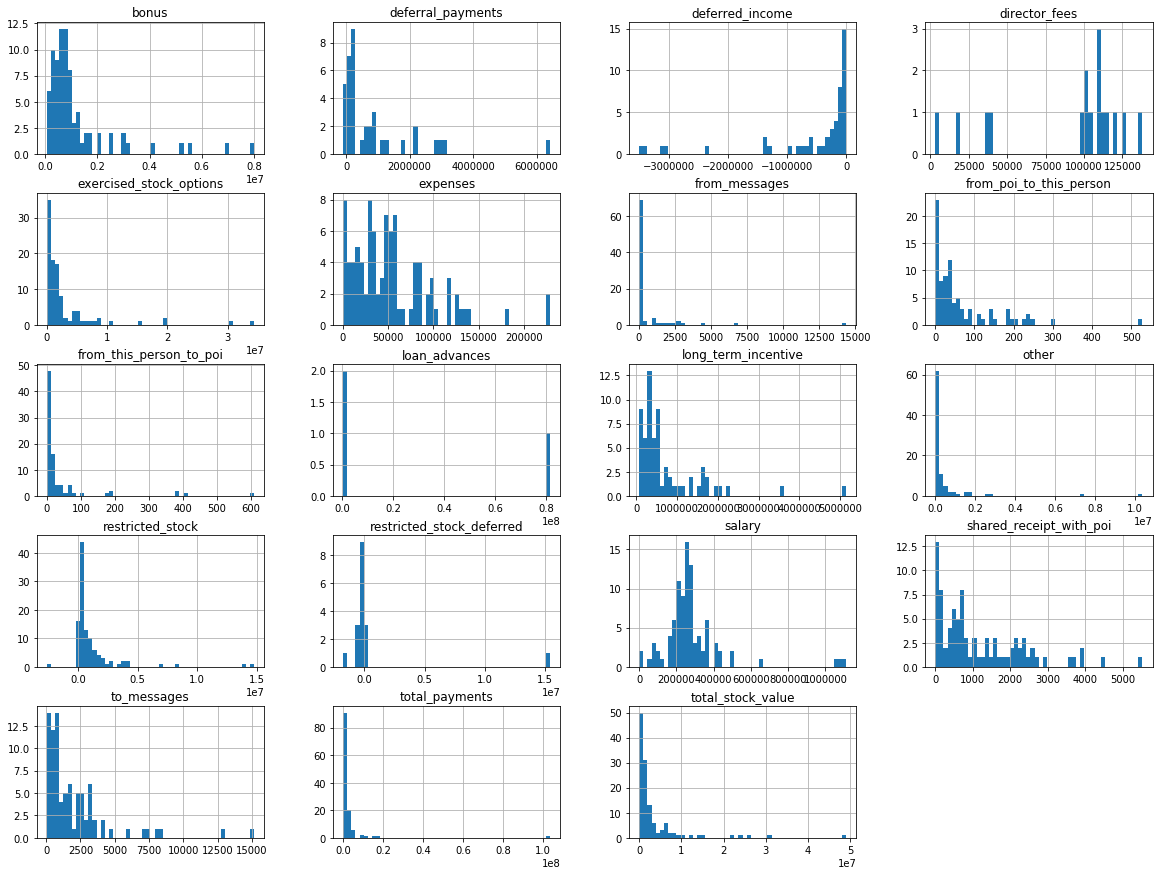

In [13]:
df_modified.transpose().hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
corr_matrix = df.drop(['email_address']).astype(float).transpose().corr()

corr_matrix['poi'].sort_values(ascending=False)

poi                          1.000000
loan_advances                0.560178
shared_receipt_with_poi      0.228313
from_poi_to_this_person      0.167722
from_this_person_to_poi      0.112940
to_messages                  0.058954
exercised_stock_options      0.052886
total_payments               0.040130
total_stock_value            0.025163
deferred_income              0.014201
restricted_stock            -0.000107
other                       -0.012457
bonus                       -0.013837
long_term_incentive         -0.021222
salary                      -0.030884
expenses                    -0.044508
from_messages               -0.074308
deferral_payments           -0.084502
director_fees                     NaN
restricted_stock_deferred         NaN
Name: poi, dtype: float64

In [15]:
df = df.drop(['TOTAL', 'LOCKHART EUGENE E', 'THE TRAVEL AGENCY IN THE PARK'], axis=1)
corr_matrix = df.drop(['email_address']).astype(float).transpose().corr()

corr_matrix['poi'].sort_values(ascending=False)

poi                          1.000000
loan_advances                0.999851
exercised_stock_options      0.503551
total_stock_value            0.366462
bonus                        0.302384
salary                       0.264976
long_term_incentive          0.254723
total_payments               0.230102
shared_receipt_with_poi      0.228313
restricted_stock             0.224814
from_poi_to_this_person      0.167722
other                        0.120270
from_this_person_to_poi      0.112940
expenses                     0.060292
to_messages                  0.058954
from_messages               -0.074308
deferral_payments           -0.098428
deferred_income             -0.265698
director_fees                     NaN
restricted_stock_deferred         NaN
Name: poi, dtype: float64

In [16]:
print (df.transpose()['loan_advances'][df.transpose()['loan_advances'] != 'NaN'])

FREVERT MARK A       2000000
LAY KENNETH L       81525000
PICKERING MARK R      400000
Name: loan_advances, dtype: object


In [17]:
#salary_median = df.transpose()['salary'].astype(float).median()
#print("Salary median:", salary_median)
#df.transpose()['salary'] = df.transpose()['salary'].astype(float).fillna(salary_median)
#df.transpose()['salary']
df.transpose().mean()
df.transpose().fillna(df.transpose().mean())

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,...,93750,874,False,NaN,NaN,80818,NaN,NaN,860136,1599641
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,386,...,NaN,566,False,126027,NaN,231330,2639,7315,969068,126027
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,...,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,...,NaN,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616


In [18]:
df = df.drop(['email_address']).transpose().astype(float)
df = df.astype(float)

In [19]:
#df['salary'] = df['salary'].astype(float).fillna(df['salary'].mean())
#df['expenses'] = df['expenses'].astype(float).fillna(df['expenses'].mean())
#df['other'] = df['other'].astype(float).fillna(df['other'].mean())

In [20]:
corr_matrix = df.corr()

corr_matrix['poi'].sort_values(ascending=False)

poi                          1.000000
loan_advances                0.999851
exercised_stock_options      0.503551
total_stock_value            0.366462
bonus                        0.302384
salary                       0.264976
long_term_incentive          0.254723
total_payments               0.230102
shared_receipt_with_poi      0.228313
restricted_stock             0.224814
from_poi_to_this_person      0.167722
other                        0.120270
from_this_person_to_poi      0.112940
expenses                     0.060292
to_messages                  0.058954
from_messages               -0.074308
deferral_payments           -0.098428
deferred_income             -0.265698
director_fees                     NaN
restricted_stock_deferred         NaN
Name: poi, dtype: float64

In [21]:
#df = df.fillna(df.mean())
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')

In [22]:
imputer.fit(df)
X = imputer.transform(df)
df = DataFrame(X, columns=df.columns)

In [23]:
corr_matrix = df.corr()

corr_matrix['poi'].sort_values(ascending=False)

poi                          1.000000
exercised_stock_options      0.401957
total_stock_value            0.377516
bonus                        0.317647
salary                       0.267665
long_term_incentive          0.236995
restricted_stock             0.236880
total_payments               0.236250
shared_receipt_with_poi      0.223100
loan_advances                0.221708
from_poi_to_this_person      0.170582
other                        0.164212
from_this_person_to_poi      0.123589
expenses                     0.084317
to_messages                  0.078147
director_fees                0.048598
restricted_stock_deferred   -0.026251
from_messages               -0.036664
deferral_payments           -0.043718
deferred_income             -0.260374
Name: poi, dtype: float64

In [24]:
to_poi_idx = df.columns.get_loc('from_this_person_to_poi')
from_poi_idx = df.columns.get_loc('from_poi_to_this_person')
shared_poi_idx = df.columns.get_loc('shared_receipt_with_poi')
from_messages_idx = df.columns.get_loc('from_messages')
to_messages_idx = df.columns.get_loc('to_messages')

from sklearn.base import BaseEstimator, TransformerMixin


class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_related_messages=True):
        self.add_related_messages = add_related_messages

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if self.add_related_messages:
            poi_related_messages = X[:, from_poi_idx] + X[:, to_poi_idx] + X[:, shared_poi_idx]
            return np.c_[X, poi_related_messages]
        else:
            return X  # np.c_[X, poi_related_messages]

In [25]:
from sklearn.pipeline import BaseEstimator, TransformerMixin


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values

In [26]:
df_full = DataFrame(data_dict).transpose()
df_labels = df_full['poi'].astype(float)
df_full = df_full.drop(['email_address','poi'], axis=1).astype(float)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

attributes = list(df_full)

full_pipeline = Pipeline([
    ('selector', DataFrameSelector(attributes)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributeAdder(add_related_messages=True)),
    ('std_scaler', StandardScaler())
])

In [28]:
pois_prepared = full_pipeline.fit_transform(df_full)

In [29]:
pois_prepared_full = np.column_stack((pois_prepared, df_labels.values))
#pois_prepared_full = pd.DataFrame(pois_prepared_full, columns=list(df_full.columns)+["poi"])
pois_prepared_full = pd.DataFrame(pois_prepared_full, columns=list(df_full.columns) + ["poi_related_messages", "poi"])

In [30]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=0.0005, class_weight='balanced', dual=False,
                         fit_intercept=True, intercept_scaling=1, max_iter=100,
                         multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                         solver='liblinear', tol=0.1, verbose=0, warm_start=False)

In [32]:
my_dataset = pois_prepared_full.transpose().to_dict()

In [33]:
from tester import test_classifier
features_list = list(df_full.columns)
features_list = ['poi'] + features_list
test_classifier(clf, my_dataset, features_list, folds=1000)

LogisticRegression(C=0.0005, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.1, verbose=0, warm_start=False)
	A: 0.76673 P: 0.29209R: 0.52650 F1: 0.37574 F2: 0.45368
	Total predictions: 15000	True positives: 1053	False positives: 2552	False negatives:  947	True negatives: 10448



In [34]:
# Now I remove the outliers
df_full = DataFrame(data_dict).transpose()
index_list = ['TOTAL', "LOCKHART EUGENE E", "THE TRAVEL AGENCY IN THE PARK", "FREVERT MARK A"]
df_full.drop(index_list, inplace=True)
df_labels = df_full['poi'].astype(float)
df_full = df_full.drop(['email_address', 'poi'], axis=1).astype(float)

# And now execute the same test
pois_prepared = full_pipeline.fit_transform(df_full)
pois_prepared_full = np.column_stack((pois_prepared, df_labels.values))
pois_prepared_full = pd.DataFrame(pois_prepared_full, columns=list(df_full.columns) + ["poi_related_messages", "poi"])
# pois_prepared_full = pd.DataFrame(pois_prepared_full, columns=list(df_full.columns)+["poi"])
my_dataset = pois_prepared_full.transpose().to_dict()
features_list = list(df_full.columns)
features_list = ['poi'] + features_list
test_classifier(clf, my_dataset, features_list, folds=1000)

LogisticRegression(C=0.0005, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.1, verbose=0, warm_start=False)
	A: 0.77587 P: 0.33614R: 0.69850 F1: 0.45387 F2: 0.57461
	Total predictions: 15000	True positives: 1397	False positives: 2759	False negatives:  603	True negatives: 10241



A recall of .6985. A Great improvement!

Now lets try another classifiers.

In [36]:
from feature_format import featureFormat, targetFeatureSplit
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import GridSearchCV

data = featureFormat(my_dataset, features_list, sort_keys=True)
labels, features = targetFeatureSplit(data)
cv = StratifiedShuffleSplit(labels, 100, random_state=42)
clf_log = LogisticRegression()
params_log = {"C": [0.00005, 0.0005, 0.005, 0.05, 0.5, 1],
              "tol": [1000 ** -1, 100 ** -1, 10 ** -1, 10 ** -5, 10 ** -10],
              "class_weight": ['balanced']
              }

scorer = make_scorer(recall_score)
grid = GridSearchCV(clf_log, param_grid=params_log, cv=cv, scoring='f1', n_jobs=-1)
grid.fit(features, labels)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

test_classifier(grid.best_estimator_, my_dataset, features_list, folds=1000)

/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/n

/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/n

The best parameters are {'C': 5e-05, 'class_weight': 'balanced', 'tol': 0.001} with a score of 0.45
LogisticRegression(C=5e-05, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.001, verbose=0, warm_start=False)
	A: 0.77607 P: 0.33511R: 0.69050 F1: 0.45123 F2: 0.56967
	Total predictions: 15000	True positives: 1381	False positives: 2740	False negatives:  619	True negatives: 10260



Accuracy: 0.77587	Precision: 0.33614	Recall: 0.69850	F1: 0.45387	F2: 0.57461
Total predictions: 15000	True positives: 1397	False positives: 2759	False negatives:  603	True negatives: 10241

In [38]:
from sklearn.neural_network import BernoulliRBM

logistic = LogisticRegression()
rbm = BernoulliRBM()
clf_rbm = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])
params_rbm = {
        "logistic__tol": [100 ** -1,10 ** -1],
        "logistic__C": [0.0005, 0.005],
        "logistic__class_weight": ['balanced'],
        "rbm__n_components": [2, 3, 4]
    }

scorer = make_scorer(recall_score)
grid = GridSearchCV(clf_rbm, param_grid=params_rbm, cv=cv, scoring='f1', verbose=True, n_jobs=-1)
grid.fit(features, labels)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

test_classifier(grid.best_estimator_, my_dataset, features_list, folds=1000)

Fitting 100 folds for each of 12 candidates, totalling 1200 fits


/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/n

/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/n

/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/n

The best parameters are {'logistic__C': 0.005, 'logistic__class_weight': 'balanced', 'logistic__tol': 0.1, 'rbm__n_components': 4} with a score of 0.44
Pipeline(steps=[('rbm', BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=4, n_iter=10,
       random_state=None, verbose=0)), ('logistic', LogisticRegression(C=0.005, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.1, verbose=0, warm_start=False))])
	A: 0.78333 P: 0.34024R: 0.66550 F1: 0.45027 F2: 0.55868
	Total predictions: 15000	True positives: 1331	False positives: 2581	False negatives:  669	True negatives: 10419



Accuracy: 0.78280	Precision: 0.33905	Recall: 0.66250	F1: 0.44854	F2: 0.55635
Total predictions: 15000	True positives: 1325	False positives: 2583	False negatives:  675	True negatives: 10417

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
params_tree = {"min_samples_split": [2, 5,6,  7], "criterion": ['gini', 'entropy']}

scorer = make_scorer(recall_score)
grid = GridSearchCV(clf_tree, param_grid=params_tree, cv=cv, scoring='f1', verbose=True, n_jobs=-1)
grid.fit(features, labels)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

test_classifier(grid.best_estimator_, my_dataset, features_list, folds=1000)

Fitting 100 folds for each of 8 candidates, totalling 800 fits


/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/n

/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/n

/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/n

/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/n

/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nacho/anaconda3/envs/n

/home/nacho/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    2.4s finished


The best parameters are {'criterion': 'entropy', 'min_samples_split': 2} with a score of 0.21
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	A: 0.79960 P: 0.22453R: 0.20500 F1: 0.21432 F2: 0.20863
	Total predictions: 15000	True positives:  410	False positives: 1416	False negatives: 1590	True negatives: 11584



Accuracy: 0.80647	***Precision: 0.24506	Recall: 0.21700***	F1: 0.23018	F2: 0.22209
Total predictions: 15000	True positives:  434	False positives: 1337	False negatives: 1566	True negatives: 11663

In [43]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
clf_adaboost = AdaBoostClassifier()
params_adaboost = {"n_estimators": [20, 25, 30, 40, 50, 100]}

scorer = make_scorer(recall_score)
grid = GridSearchCV(clf_adaboost, param_grid=params_adaboost, cv=cv, scoring=scorer)
grid.fit(features, labels)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

test_classifier(grid.best_estimator_, my_dataset, features_list, folds=1000)

The best parameters are {'n_estimators': 100} with a score of 0.23
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)
	Accuracy: 0.83207	Precision: 0.31992	Recall: 0.23050	F1: 0.26795	F2: 0.24415
	Total predictions: 15000	True positives:  461	False positives:  980	False negatives: 1539	True negatives: 12020



Accuracy: 0.83147	***Precision: 0.31616	Recall: 0.22700***	F1: 0.26426	F2: 0.24057
Total predictions: 15000	True positives:  454	False positives:  982	False negatives: 1546	True negatives: 12018

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf_random_tree = RandomForestClassifier()
params_random_tree = {"n_estimators": [2, 3, 5], "criterion": ['gini']}

grid = GridSearchCV(clf_random_tree, param_grid=params_random_tree, cv=cv, scoring=scorer)
grid.fit(features, labels)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
test_classifier(grid.best_estimator_, my_dataset, features_list, folds=1000)

The best parameters are {'criterion': 'gini', 'n_estimators': 3} with a score of 0.21
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=3, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.83173	Precision: 0.30650	Recall: 0.20750	F1: 0.24747	F2: 0.22183
	Total predictions: 15000	True positives:  415	False positives:  939	False negatives: 1585	True negatives: 12061



Accuracy: 0.83467	***Precision: 0.31651	Recall: 0.20700***	F1: 0.25030	F2: 0.22239
Total predictions: 15000	True positives:  414	False positives:  894	False negatives: 1586	True negatives: 12106


In [49]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
params_knn = {"n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9], "p": [2, 3, 4]}

grid = GridSearchCV(clf_knn, param_grid=params_knn, cv=cv, scoring=scorer)
grid.fit(features, labels)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

test_classifier(grid.best_estimator_, my_dataset, features_list, folds=1000)

The best parameters are {'n_neighbors': 3, 'p': 2} with a score of 0.17
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
	Accuracy: 0.85053	Precision: 0.37100	Recall: 0.17400	F1: 0.23690	F2: 0.19467
	Total predictions: 15000	True positives:  348	False positives:  590	False negatives: 1652	True negatives: 12410



Accuracy: 0.85053	***Precision: 0.37100	Recall: 0.17400***	F1: 0.23690	F2: 0.19467
Total predictions: 15000	True positives:  348	False positives:  590	False negatives: 1652	True negatives: 12410

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf_lda = LinearDiscriminantAnalysis()
params_lda = {"n_components": [0, 1, 2, 5, 10]}

grid = GridSearchCV(clf_lda, param_grid=params_lda, cv=cv, scoring=scorer)
grid.fit(features, labels)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

test_classifier(grid.best_estimator_, my_dataset, features_list, folds=1000)

/home/intranet.biblostravel.com/igabbarini/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/intranet.biblostravel.com/igabbarini/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/intranet.biblostravel.com/igabbarini/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/intranet.biblostravel.com/igabbarini/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/intranet.biblostravel.com/igabbarini/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinea

/home/intranet.biblostravel.com/igabbarini/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/intranet.biblostravel.com/igabbarini/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/intranet.biblostravel.com/igabbarini/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/intranet.biblostravel.com/igabbarini/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/intranet.biblostravel.com/igabbarini/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinea

The best parameters are {'n_components': 0} with a score of 0.18
LinearDiscriminantAnalysis(n_components=0, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
	Accuracy: 0.83573	Precision: 0.30570	Recall: 0.18250	F1: 0.22855	F2: 0.19850
	Total predictions: 15000	True positives:  365	False positives:  829	False negatives: 1635	True negatives: 12171



Accuracy: 0.83573	***Precision: 0.30570	Recall: 0.18250***	F1: 0.22855	F2: 0.19850

Total predictions: 15000	True positives:  365	False positives:  829	False negatives: 1635	True negatives: 12171

In [51]:
from sklearn.svm import SVC

clf_svc = SVC(kernel='rbf', cache_size=400, C=10000)
params_svc = {"C": [0.5, 1, 10],
              "class_weight": ['balanced'],
              "kernel": ['sigmoid']}

grid = GridSearchCV(clf_svc, param_grid=params_svc, cv=cv, scoring=scorer, n_jobs=-1)
grid.fit(features, labels)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

test_classifier(grid.best_estimator_, my_dataset, features_list, folds=1000)

The best parameters are {'C': 1, 'class_weight': 'balanced', 'kernel': 'sigmoid'} with a score of 0.82
SVC(C=1, cache_size=400, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.75793	Precision: 0.33340	Recall: 0.81600	F1: 0.47339	F2: 0.63280
	Total predictions: 15000	True positives: 1632	False positives: 3263	False negatives:  368	True negatives: 9737



Accuracy: 0.75793	***Precision: 0.33340	Recall: 0.81600***	F1: 0.47339	F2: 0.63280

Total predictions: 15000	True positives: 1632	False positives: 3263	False negatives:  368	True negatives: 9737

#### That's a great improvement! 0.816 recall

Now I think I should do some tweaking in the features. Maybe I should add some features and remove the useless.

Let's modify the CombinedAttributeAdder to add more combinations

In [40]:
to_poi_idx = df.columns.get_loc('from_this_person_to_poi') - 1
from_poi_idx = df.columns.get_loc('from_poi_to_this_person') - 1
shared_poi_idx = df.columns.get_loc('shared_receipt_with_poi') - 1
from_messages_idx = df.columns.get_loc('from_messages') - 1
to_messages_idx = df.columns.get_loc('to_messages') - 1
total_payments_idx = df.columns.get_loc('total_payments') - 1
total_stock_value_idx = df.columns.get_loc('total_stock_value') - 1
exercised_stock_options_idx = df.columns.get_loc('exercised_stock_options') - 1
bonus_idx = df.columns.get_loc('bonus') - 1
salary_idx = df.columns.get_loc('salary') - 1

payment_comp = ['salary', 'deferral_payments','bonus', 'expenses', 'loan_advances',
                'other', 'director_fees', 'deferred_income', 'long_term_incentive']

payment_total = ['total_payments']

stock_comp = ['exercised_stock_options', 'restricted_stock','restricted_stock_deferred',]

stock_total = ['total_stock_value']

email_comp = ['shared_receipt_with_poi', 'from_this_person_to_poi', 'from_poi_to_this_person' ]

email_totals = ['from_messages', 'to_messages']

all_comp = payment_comp + stock_comp

from sklearn.base import BaseEstimator, TransformerMixin


class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_related_messages=True):
        self.add_related_messages = add_related_messages

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        total_compensation = X[:, total_payments_idx] + X[:, total_stock_value_idx]
        poi_related_messages = X[:, from_poi_idx] + X[:, to_poi_idx]
        #exercised_stock_options_squared = X[:, exercised_stock_options_idx] ** 2
        #bonus_total_pay_ratio = X[:, bonus_idx] + X[:, total_payments_idx]
        from_poi_ratio = X[:, from_poi_idx] + X[:, from_messages_idx]
        #bonus_squared = X[:, bonus_idx] ** 2
        #salary_squared = X[:, salary_idx] ** 2
        total_payments_squared = X[:, total_payments_idx] ** 2
        my_data = {}
        for each in all_comp:
            each_idx = df.columns.get_loc(each) - 1
            foo = "{0}_squared".format(each)
            my_data[foo] = X[:, each_idx] ** 2
            
        for each in payment_comp:
            
            each_idx = df.columns.get_loc(each) - 1
            foo = '{0}_{1}_ratio'.format(each, 'total_pay')
            my_data[foo] =X[:, each_idx]/X[:, total_payments_idx]

        for each in stock_comp:
            each_idx = df.columns.get_loc(each) - 1
            foo = '{0}_{1}_ratio'.format(each, 'total_stock')
            my_data[foo] =X[:, each_idx]/X[:, total_stock_value_idx]

        total_compensation = X[:, total_payments_idx] + X[:, total_stock_value_idx]
        for each in all_comp:
            each_idx = df.columns.get_loc(each) - 1
            foo = '{0}_{1}_ratio'.format(each, 'total_compensation')
            my_data[foo] =X[:, each_idx]/total_compensation


        X = np.c_[X, total_compensation]
        X = np.c_[X, poi_related_messages]
        #X = np.c_[X, exercised_stock_options_squared]
        #X = np.c_[X, bonus_total_pay_ratio]
        X = np.c_[X, from_poi_ratio]
        #X = np.c_[X, bonus_squared]
        #X = np.c_[X, salary_squared]
        X = np.c_[X, total_payments_squared]
        
        for each in all_comp:
            foo = '{0}_squared'.format(each)
            X = np.c_[X, my_data[foo]]
        
        for each in payment_comp:
            foo = '{0}_{1}_ratio'.format(each, 'total_pay')
            X = np.c_[X, my_data[foo]]

        for each in stock_comp:
            foo = '{0}_{1}_ratio'.format(each, 'total_stock')
            X = np.c_[X, my_data[foo]]

        for each in all_comp:
            foo = '{0}_{1}_ratio'.format(each, 'total_compensation')
            X = np.c_[X, my_data[foo]]
            
        return X

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

attributes = list(df_full)

full_pipeline = Pipeline([
    ('selector', DataFrameSelector(attributes)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributeAdder(add_related_messages=True)),
    ('std_scaler', StandardScaler())
])

In [42]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0,1])

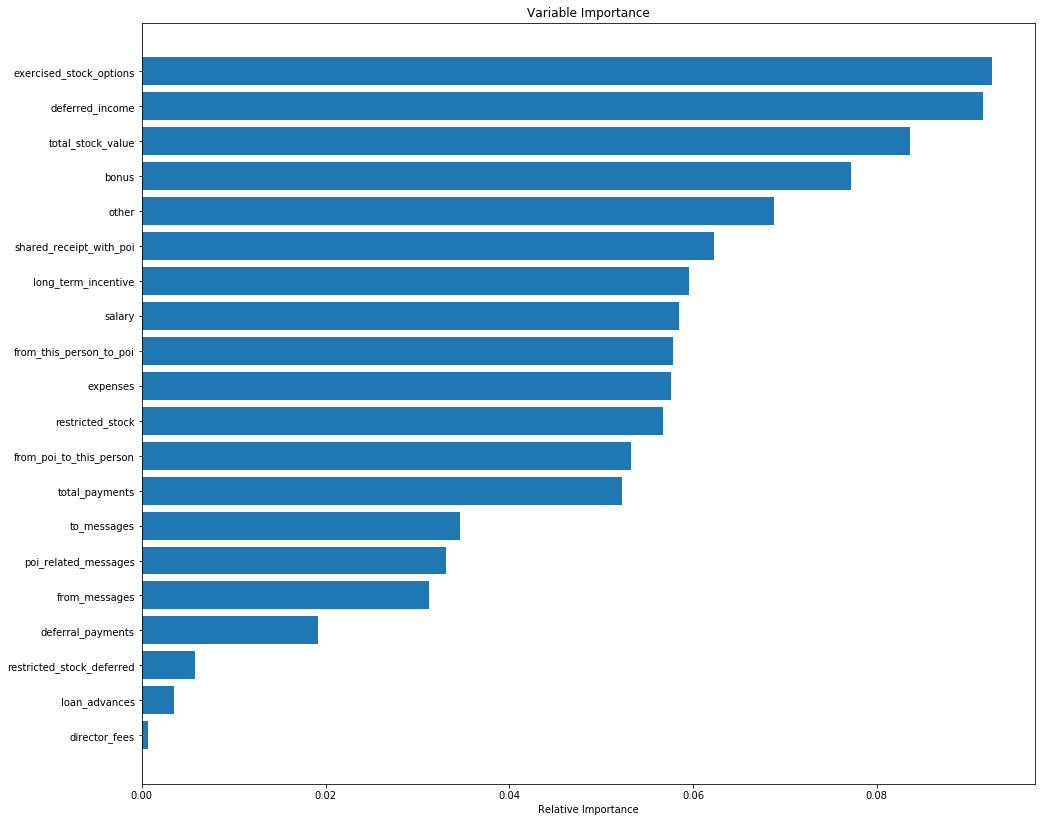

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
from pandas import np

features2 = np.array(pois_prepared_full.drop('poi', axis=1).columns)

clf = ExtraTreesClassifier(n_estimators=3000)
clf.fit(pois_prepared_full[features2], pois_prepared_full['poi'])

importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

padding = np.arange(len(features2)) + 0.5
plt.figure(figsize=(16,14))
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features2[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [190]:
df_full = DataFrame(data_dict).transpose()
index_list = ['TOTAL', "LOCKHART EUGENE E", "FREVERT MARK A"]
df_full.drop(index_list, inplace=True)
df_labels = df_full['poi'].astype(float)
df_full = df_full.drop(['email_address', 'poi'], axis=1).astype(float)
added_features_list = ["total_compensation", "poi_related_messages", "exercised_stock_options_squared",
                       "from_poi_ratio", "bonus_squared", "salary_squared", "total_payments_squared", 
                       "deferral_payments_squared", "expenses_squared", "loan_advances_squared",
                      "other_squared", "director_fees_squared", "deferred_income_squared", 
                       "long_term_incentive_squared", "restricted_stock_squared", "restricted_stock_deferred_squared",
                      "salary_total_pay_ratio","deferral_payments_total_pay_ratio","bonus_total_pay_ratio",
                       "expenses_total_pay_ratio","loan_advances_total_pay_ratio","other_total_pay_ratio"
                       ,"director_fees_total_pay_ratio","deferred_income_total_pay_ratio","long_term_incentive_total_pay_ratio"
                       ,"exercised_stock_options_total_stock_ratio","restricted_stock_total_stock_ratio"
                       ,"restricted_stock_deferred_total_stock_ratio","salary_total_compensation_ratio"
                       ,"deferral_payments_total_compensation_ratio","bonus_total_compensation_ratio"
                       ,"expenses_total_compensation_ratio","loan_advances_total_compensation_ratio"
                       ,"other_total_compensation_ratio","director_fees_total_compensation_ratio"
                       ,"deferred_income_total_compensation_ratio","long_term_incentive_total_compensation_ratio","exercised_stock_options_total_compensation_ratio"
                       ,"restricted_stock_total_compensation_ratio","restricted_stock_deferred_total_compensation_ratio"]


# And now execute the same test
pois_prepared = full_pipeline.fit_transform(df_full)
pois_prepared_full = np.column_stack((pois_prepared, df_labels.values))
pois_prepared_full = pd.DataFrame(pois_prepared_full, columns=list(df_full.columns) + added_features_list + ["poi"])
corrs = pois_prepared_full.corr()

my_dataset = pois_prepared_full.transpose().to_dict()

features_list = list(df_full.columns)
features_list = ['poi'] + features_list + added_features_list


data = featureFormat(my_dataset, features_list, sort_keys=True)
labels, features = targetFeatureSplit(data)

In [191]:
#I'll remove features that have less than 65 values set 

features_list.remove("long_term_incentive")
features_list.remove("deferred_income")           #A: 0.69640 P: 0.26874 R: 0.74200 F1: 0.39458 F2: 0.54874
features_list.remove("restricted_stock_deferred") #A: 0.69740 P: 0.26939 R: 0.74150	F1: 0.39520	F2: 0.54906
#features_list.remove("director_fees")            #A: 0.69580 P: 0.26755 R: 0.73750 F1: 0.39265	F2: 0.54577
features_list.remove("loan_advances")             #A: 0.69840 P: 0.27063 R: 0.74450	F1: 0.39696	F2: 0.55140

#Now I'll remove the ratio and squared of the previous removed features

#features_list.remove("long_term_incentive_squared")        #A: 0.69773 P: 0.27014 R: 0.74450 F1: 0.39643 F2: 0.55099
features_list.remove("long_term_incentive_total_pay_ratio") #A: 0.69873 P: 0.27195 R: 0.75100 F1: 0.39931 F2: 0.55535
#features_list.remove("long_term_incentive_total_compensation_ratio") #A: 0.69700 P: 0.26918 R: 0.74200 F1: 0.39505 F2: 0.54910

features_list.remove("deferred_income_squared")                   #A: 0.69867 P: 0.27199 R: 0.75150 F1: 0.39942 F2: 0.55560
#features_list.remove("deferred_income_total_pay_ratio")          #A: 0.69847 P: 0.27159 R: 0.75000 F1: 0.39878 F2: 0.55461
#features_list.remove("deferred_income_total_compensation_ratio") #A: 0.70620 P: 0.27271 R: 0.72200 F1: 0.39589 F2: 0.54306

#features_list.remove("restricted_stock_deferred_squared")                  #A: 0.69900 P: 0.27157 R: 0.74750 F1: 0.39840 F2: 0.55350
features_list.remove("restricted_stock_deferred_total_stock_ratio")         #A: 0.69913 P: 0.27266 R: 0.75350 F1: 0.40043 F2: 0.55703
#features_list.remove("restricted_stock_deferred_total_compensation_ratio") #A: 0.70480 P: 0.27601 R: 0.74800 F1: 0.40323 F2: 0.55738

features_list.remove("other_squared")                #A: 0.69493 P: 0.27292 R: 0.77400 F1: 0.40355 F2: 0.56612
features_list.remove("deferral_payments_squared")    #A: 0.69053 P: 0.27074R: 0.78000 F1: 0.40196 F2: 0.56678
features_list.remove("exercised_stock_options")      #A: 0.67813 P: 0.26066 R: 0.77000 F1: 0.38948 F2: 0.55364
#features_list.remove("bonus") #Accuracy: 0.68073	Precision: 0.25928	Recall: 0.75100	F1: 0.38547	F2: 0.54448
#features_list.remove("total_payments_squared") #Accuracy: 0.68053	Precision: 0.26307	Recall: 0.77500	F1: 0.39280	F2: 0.55788
#features_list.remove("salary"
#features_list.remove("director_fees"
#features_list.remove("expenses"
#features_list.remove("from_messages"
#features_list.remove("from_poi_to_this_person"
#features_list.remove("from_this_person_to_poi"
#features_list.remove("loan_advances"
#features_list.remove("other"
#features_list.remove("restricted_stock"

#features_list.remove("total_stock_value")
#features_list.remove("total_compensation")

#features_list.remove("salary_squared")
#features_list.remove("bonus_squared")
#features_list.remove("shared_receipt_with_poi"
#features_list.remove("to_messages"
#features_list.remove("total_payments"
#features_list.remove("poi_related_messages"
#features_list.remove("exercised_stock_options_squared"
#features_list.remove("expenses_squared"
#features_list.remove("loan_advances_squared"
#features_list.remove("director_fees_squared"
#features_list.remove("restricted_stock_squared"

#features_list.remove("from_poi_ratio")
features_list.remove("salary_total_pay_ratio")
features_list.remove("deferral_payments_total_pay_ratio")
features_list.remove("bonus_total_pay_ratio")
features_list.remove("expenses_total_pay_ratio")
features_list.remove("loan_advances_total_pay_ratio")
#features_list.remove("other_total_pay_ratio")
#features_list.remove("director_fees_total_pay_ratio")
#features_list.remove("exercised_stock_options_total_stock_ratio")
#features_list.remove("restricted_stock_total_stock_ratio")
#features_list.remove("salary_total_compensation_ratio")
#features_list.remove("deferral_payments_total_compensation_ratio")
#features_list.remove("bonus_total_compensation_ratio")
#features_list.remove("expenses_total_compensation_ratio")
#features_list.remove("loan_advances_total_compensation_ratio")
#features_list.remove("other_total_compensation_ratio")
#features_list.remove("director_fees_total_compensation_ratio")
#features_list.remove("exercised_stock_options_total_compensation_ratio")
#features_list.remove("restricted_stock_total_compensation_ratio")

In [192]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import warnings
warnings.filterwarnings('ignore')

sk_fold = StratifiedShuffleSplit(labels, 100, random_state=42)
        
pipeline = Pipeline(steps=[('standardizer', StandardScaler(copy=True, with_mean=True, with_std=True)),
                           ('selection', SelectKBest(score_func=f_classif)),
                           ('reducer', PCA()),
                           #('classifier', LinearSVC(penalty='l1', dual=False)),
                           #('KMeans', KMeans(n_clusters=2))
                           ('classifier', LogisticRegression()),
                           #('classifier2', SGDClassifier(n_iter=300))
                            
                           #('ET', ExtraTreesClassifier(bootstrap=True, criterion='gini', n_estimators=1500, n_jobs=1,
                           #                            oob_score=True, random_state=None, verbose=0,
                           #                            max_features='auto', min_samples_split=2,
                           #                            min_samples_leaf=1))
                             ]) # ,
                    
params = {
          #'ET__n_estimators': [1500],
          #'ET__max_features': ['auto'],
          #'ET__min_samples_split': [2, 4],
          #'ET__min_samples_leaf': [1, 2],
          #'ET__criterion' : ['gini'],
          'selection__k': [18],
          'classifier__C': [0.1, 1, 10],
          'classifier__class_weight': [{True: 11, False: 1}],
          'classifier__tol': [0.01,0.1,1],
          #'classifier2__alpha': [0.0001, 0.001],
          #'classifier2__loss': ['hinge', 'log', 'modified_huber'],
          #'classifier2__class_weight': [{True: 4, False: 1}, {True: 10, False: 1}],
          #'classifier__penalty': ['l1', 'l2']
          'reducer__n_components': [1],
          'reducer__whiten': [True],
          }


# Scoring: average_precision, roc_auc, f1, recall, precision
grid_search = GridSearchCV(pipeline, param_grid=params, cv=sk_fold, n_jobs =-1, scoring='f1', verbose=True)
grid_search.fit(features, labels)
print("The best parameters are %s with a score of %0.2f" % (grid_search.best_params_, grid_search.best_score_))
test_classifier(grid_search.best_estimator_, my_dataset, features_list, folds=1000)
print("Using this set of features %s" % features_list)

Fitting 100 folds for each of 9 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    3.6s finished


The best parameters are {'classifier__C': 1, 'classifier__class_weight': {True: 11, False: 1}, 'classifier__tol': 0.01, 'reducer__n_components': 1, 'reducer__whiten': True, 'selection__k': 18} with a score of 0.40
Pipeline(steps=[('standardizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selection', SelectKBest(k=18, score_func=<function f_classif at 0x7f0b99c9c0d0>)), ('reducer', PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)), ('...alty='l2', random_state=None,
          solver='liblinear', tol=0.01, verbose=0, warm_start=False))])
	A: 0.72567 P: 0.30296R: 0.81300 F1: 0.44143 F2: 0.60821
	Total predictions: 15000	True positives: 1626	False positives: 3741	False negatives:  374	True negatives: 9259

Using this set of features ['poi', 'bonus', 'deferral_payments', 'director_fees', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'other', 'restricted_stock', 'salary'

A: 0.70687 P: 0.29304R: 0.84850 F1: 0.43563 F2: 0.61526 with this params **{'classifier__C': 10, 'classifier__class_weight': {True: 12, False: 1}, 'classifier__tol': 0.1, 'reducer__n_components': 1, 'reducer__whiten': True, 'selection__k': 19}**

A: 0.71020 P: 0.29680R: 0.85700 F1: 0.44090 F2: 0.62214 with this params **{'classifier__C': 10, 'classifier__class_weight': {True: 12, False: 1}, 'classifier__tol': 0.1, 'reducer__n_components': 1, 'reducer__whiten': True, 'selection__k': 18}**

A: 0.74953 P: 0.31103R: 0.72300 F1: 0.43495 F2: 0.57159 with this params **{'classifier__C': 1, 'classifier__class_weight': {True: 10, False: 1}, 'classifier__tol': 0.1, 'reducer__n_components': 1, 'reducer__whiten': True, 'selection__k': 17}**

A: 0.72560 P: 0.30291R: 0.81300 F1: 0.44137 F2: 0.60817 with this params **{'classifier__C': 1, 'classifier__class_weight': {True: 11, False: 1}, 'classifier__tol': 0.1, 'reducer__n_components': 1, 'reducer__whiten': True, 'selection__k': 18}**

In [94]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from tester import test_classifier

cv = StratifiedShuffleSplit(labels, 1000, random_state=42)

# First I test in a LogisticRegression Classifier
clf_lrc = LogisticRegression(C=0.0005, class_weight='balanced', dual=False,
                             fit_intercept=True, intercept_scaling=1, max_iter=100,
                             multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                             solver='liblinear', tol=0.1, verbose=0, warm_start=False)

params_lrc = {"C": [0.005, 0.01, 0.1],
              "tol": [1.8, 2],
              "class_weight": ['balanced']}

grid = GridSearchCV(clf_lrc, param_grid=params_lrc, cv=cv, scoring='f1', n_jobs=-1, verbose=True)
grid.fit(features, labels)
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
test_classifier(grid.best_estimator_, my_dataset, features_list, folds=1000)

#y_scores = cross_val_predict(grid.best_estimator_, features, labels, cv=3, method='decision_function')

#precisions, recalls, thresholds = precision_recall_curve(labels, y_scores)

#plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
#plt.show()

Fitting 1000 folds for each of 6 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Done 1160 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:   10.9s finished


The best parameters are {'C': 0.005, 'class_weight': 'balanced', 'tol': 1.8} with a score of 0.40
LogisticRegression(C=0.005, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=1.8, verbose=0, warm_start=False)
	A: 0.69047 P: 0.27711R: 0.82150 F1: 0.41443 F2: 0.58978
	Total predictions: 15000	True positives: 1643	False positives: 4286	False negatives:  357	True negatives: 8714



In [96]:
grid_search.best_params_

{'classifier__C': 10,
 'classifier__class_weight': {False: 1, True: 12},
 'classifier__tol': 0.1,
 'reducer__n_components': 1,
 'reducer__whiten': True,
 'selection__k': 18}

Fitting 1000 folds for each of 6 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 4664 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:   15.5s finished


The best parameters are {'C': 1, 'class_weight': 'balanced', 'kernel': 'sigmoid', 'tol': 1.6} with a score of 0.41
SVC(C=1, cache_size=400, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=1.6, verbose=False)
	A: 0.62153 P: 0.25105R: 0.92700 F1: 0.39510 F2: 0.60253
	Total predictions: 15000	True positives: 1854	False positives: 5531	False negatives:  146	True negatives: 7469



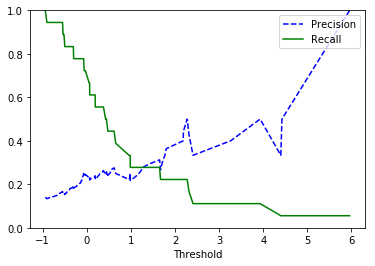

In [76]:
# Then I'll test on a svm classifier
clf_svc = SVC(kernel='rbf', cache_size=400, C=10000)
params_svc = {"C": [0.005, 0.5, 1],
              "tol": [1.6],
              "class_weight": ['balanced'],
              "kernel": ['sigmoid', 'rbf']}

grid = GridSearchCV(clf_svc, param_grid=params_svc, cv=cv, scoring='f1', n_jobs=-1, verbose=True)
grid.fit(features, labels)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
test_classifier(grid.best_estimator_, my_dataset, features_list, folds=1000)

y_scores = cross_val_predict(grid.best_estimator_, features, labels, cv=3, method='decision_function')

precisions, recalls, thresholds = precision_recall_curve(labels, y_scores)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()